In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook',font_scale=1.25)
from IPython.core.display import HTML,display

C:\Users\HOME\AppData\Local\Temp\ipykernel_4184\12485936.py:6: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML,display


In [3]:
df = pd.read_csv('C:/Users/HOME/OneDrive/Desktop/removed project/ipl stats/Most Wickets All Seasons Combine.csv',index_col=[0])
df.head()

,Player,Mat,Inns,Ov,Runs,Wkts,BBI,Avg,Econ,SR,4w,5w
0,Sohail Tanvir,11,11,41.1,266,22,6/14,12.09,6.46,11.22,1,1
1,Shane Warne,15,15,52.0,404,19,3/19,21.26,7.76,16.42,0,0
2,Shanthakumaran Sreesanth,15,15,51.1,442,19,3/29,23.26,8.63,16.15,0,0
3,Shane Watson,15,15,54.1,383,17,3/10,22.52,7.07,19.11,0,0
4,Manpreet Gony,16,16,60.0,443,17,3/34,26.05,7.38,21.17,0,0


In [4]:
# checking for NaN values
df.isna().sum()

Player    0
Mat       0
Inns      0
Ov        0
Runs      0
Wkts      0
BBI       0
Avg       0
Econ      0
SR        0
4w        0
5w        0
dtype: int64

In [5]:
# checking players who have played the most seasons
df['Player'].value_counts()

Player
Dhawal Kulkarni      14
Piyush Chawla        14
Amit Mishra          14
Ishant Sharma        13
Ravindra Jadeja      13
                     ..
Veer Pratap Singh     1
Doug Bracewell        1
Robin Peterson        1
Michael Clarke        1
Adil Rashid           1
Name: count, Length: 438, dtype: int64

In [6]:
# checking for duplicate entries
df[df.duplicated()]

,Player,Mat,Inns,Ov,Runs,Wkts,BBI,Avg,Econ,SR,4w,5w
115,Ishant Sharma,11,11,43.0,297,11,2/15,27.0,6.9,23.45,0,0


In [7]:
# droping the duplicate entries
df.drop_duplicates(inplace=True)

In [8]:
no_of_nan_values=df.isna().sum().sum()
display(HTML(f"<h3>  <b style='color:#000080;font-size:22px;'>Inference </b>:<ul><li>There are {no_of_nan_values} nan values.</li></ul></h3>"))

PLAYERS THAT HAVE PLAYED THE MOST MATCHES 

In [9]:
no_of_seasons=df['Player'].value_counts().reset_index()
no_of_seasons.columns=['Player','No. of Seasons Played']
no_of_seasons.sort_values('Player',inplace=True)
no_of_seasons.reset_index(inplace=True)

In [10]:
players_of_interest = ['Shane Warne', 'Piyush Chawla', 'Ishant Sharma', 'Amit Mishra', 'Robin Peterson']

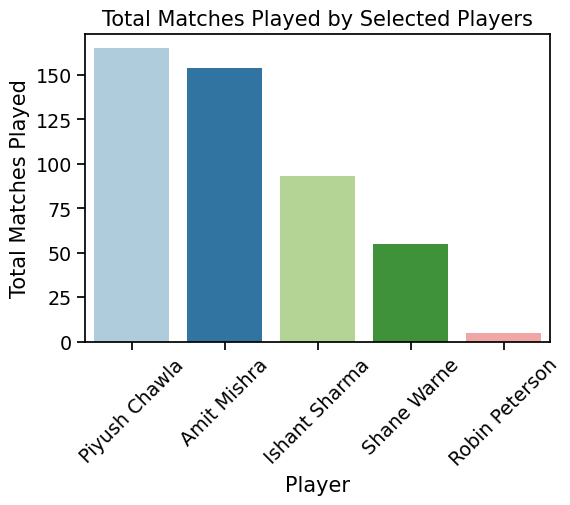

In [11]:
# Grouping by player and calculating total matches played
matches = df.groupby('Player')['Mat'].sum().reset_index()
matches.columns = ['Player', 'Total Matches Played']

# Sorting and selecting the top players of interest
temp = matches[matches['Player'].isin(players_of_interest)].sort_values('Total Matches Played', ascending=False)

# Plotting
plt.figure(figsize=(6, 4))
sns.barplot(data=temp, x='Player', y='Total Matches Played', palette='Paired')
plt.title('Total Matches Played by Selected Players')
plt.xlabel('Player')
plt.ylabel('Total Matches Played')
plt.xticks(rotation=45)
plt.show()


PLAYERS WITH MOST RUNS CONCDED

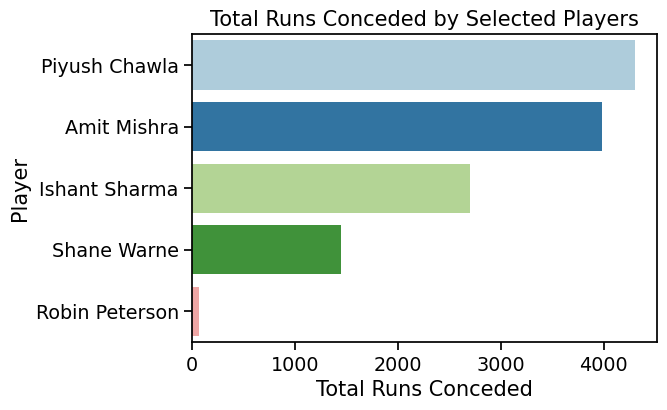

In [12]:
# Assuming 'df' contains the necessary data and 'players_of_interest' is defined

# Grouping by player and calculating total runs conceded
runs_conceded = df.groupby('Player')['Runs'].sum().reset_index()
runs_conceded.columns = ['Player', 'Total Runs Conceded']

# Sorting and selecting the top players of interest
temp = runs_conceded[runs_conceded['Player'].isin(players_of_interest)].sort_values('Total Runs Conceded', ascending=False)

# Plotting a horizontal bar chart
plt.figure(figsize=(6, 4))
sns.barplot(data=temp, y='Player', x='Total Runs Conceded', palette='Paired')
plt.title('Total Runs Conceded by Selected Players')
plt.xlabel('Total Runs Conceded')
plt.ylabel('Player')
plt.show()


PLAYER WITH MOST WICKETS TAKEN

C:\Users\HOME\AppData\Local\Temp\ipykernel_4184\4019047115.py:15: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=temp, x='Total Wickets', y='Player', palette='tab10', size=10, jitter=True)


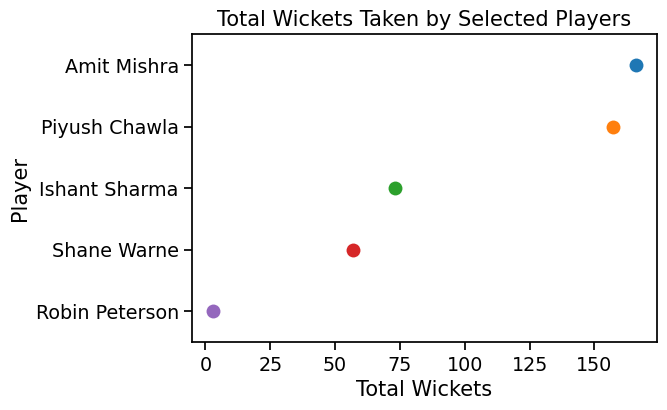

In [13]:
# Assuming 'df' contains the necessary data and 'players_of_interest' is defined

# Grouping and summing the wickets for each player
runs_s = df.groupby('Player')['Wkts'].sum().reset_index()
runs_s.columns = ['Player', 'Total Wickets']

# Filtering for players of interest
temp = runs_s[runs_s['Player'].isin(players_of_interest)]

# Sorting by total wickets
temp = temp.sort_values('Total Wickets', ascending=False)[:50]

# Plotting a dot plot
plt.figure(figsize=(6, 4))
sns.stripplot(data=temp, x='Total Wickets', y='Player', palette='tab10', size=10, jitter=True)
plt.title('Total Wickets Taken by Selected Players')
plt.xlabel('Total Wickets')
plt.ylabel('Player')
plt.show()


ECONOMY OF THE BOWLERS

In [14]:
overall_avg=pd.DataFrame()


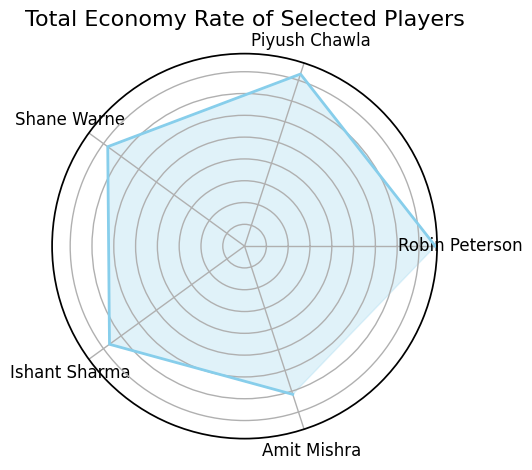

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define the players of interest and their corresponding data
players_of_interest = ['Shane Warne', 'Piyush Chawla', 'Ishant Sharma', 'Amit Mishra', 'Robin Peterson']

# Assuming 'df' contains the necessary data and 'players_of_interest' is defined

# Grouping and calculating the total economy rate for each player
econ_s = df.groupby('Player')['Econ'].first().reset_index()

# Filtering for players of interest
temp = econ_s[econ_s['Player'].isin(players_of_interest)]

# Sorting by total economy rate
temp = temp.sort_values('Econ', ascending=False)

# Extracting player names and total economy
players = temp['Player']
total_econ = temp['Econ']

# Number of variables (players)
num_players = len(players)

# Create a radar chart for total economy
angles = np.linspace(0, 2 * np.pi, num_players, endpoint=False).tolist()

fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(polar=True))
ax.fill(angles, total_econ, color='skyblue', alpha=0.25)
ax.plot(angles, total_econ, color='skyblue', linewidth=2)
ax.set_yticklabels([])
ax.set_xticks(angles)
ax.set_xticklabels(players, fontsize=12)
ax.set_title('Total Economy Rate of Selected Players', fontsize=16, pad=20)

plt.show()


NUMBER OF BOWLS BOWLER HAS BOWL BEFORE TAKING A WICKET (SR)

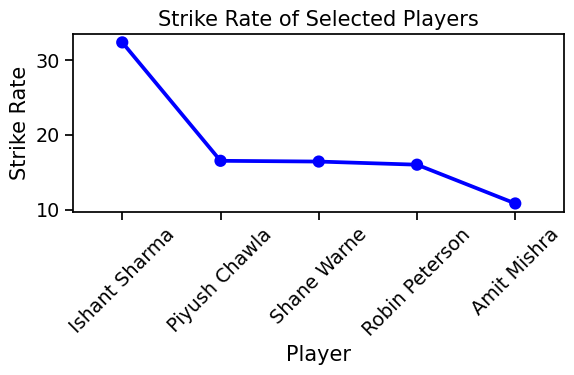

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the players of interest and their corresponding data
players_of_interest = ['Shane Warne', 'Piyush Chawla', 'Ishant Sharma', 'Amit Mishra', 'Robin Peterson']

# Assuming 'df' contains the necessary data and 'players_of_interest' is defined

# Grouping and calculating the strike rate for each player
strike_rate = df.groupby('Player')['SR'].first().reset_index()
strike_rate.columns = ['Player', 'Strike Rate']

# Filtering for players of interest
temp = strike_rate[strike_rate['Player'].isin(players_of_interest)]

# Sorting by strike rate
temp = temp.sort_values('Strike Rate', ascending=False)

# Plotting
plt.figure(figsize=(6, 4))
sns.pointplot(data=temp, x='Player', y='Strike Rate', color='blue', markers='o')
plt.title('Strike Rate of Selected Players')
plt.xlabel('Player')
plt.ylabel('Strike Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


4 WICKET HAWLS OF THE BOWLERS

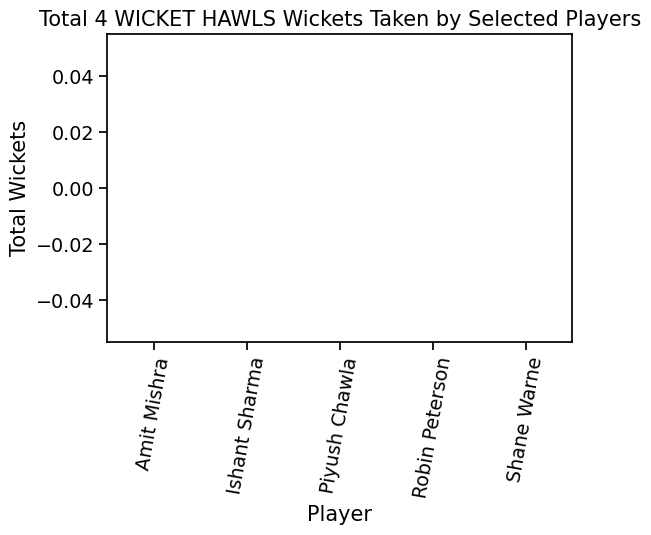

In [17]:
players_of_interest = ['Shane Warne', 'Piyush Chawla', 'Ishant Sharma', 'Amit Mishra', 'Robin Peterson']

# Grouping and summing the wickets for each player
runs_s = df.groupby('Player')['4w'].first().reset_index()

runs_s.columns = ['Player', '4w']

# Filtering for players of interest
temp = runs_s[runs_s['Player'].isin(players_of_interest)]

# Sorting by total wickets
temp = temp.sort_values('4w', ascending=False)[:50]

# Plotting
plt.figure(figsize=(6, 4))
sns.barplot(data=temp, x='Player', y='4w', palette='tab10')
plt.title('Total 4 WICKET HAWLS Wickets Taken by Selected Players')
plt.xlabel('Player')
plt.ylabel('Total Wickets')
plt.xticks(rotation=80)
plt.show()

In [18]:
with open('data_plot_bowling.pickle','wb') as f:
    pickle.dump((df, plt.gcf()), f)


<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>